In [117]:
import pandas as pd

In [118]:
data=pd.read_csv("loan_approved.csv")

In [119]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [120]:
import seaborn as sns


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [122]:
data['Loan_ID'].unique()

array(['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008',
       'LP001011', 'LP001013', 'LP001014', 'LP001018', 'LP001020',
       'LP001024', 'LP001027', 'LP001028', 'LP001029', 'LP001030',
       'LP001032', 'LP001034', 'LP001036', 'LP001038', 'LP001041',
       'LP001043', 'LP001046', 'LP001047', 'LP001050', 'LP001052',
       'LP001066', 'LP001068', 'LP001073', 'LP001086', 'LP001087',
       'LP001091', 'LP001095', 'LP001097', 'LP001098', 'LP001100',
       'LP001106', 'LP001109', 'LP001112', 'LP001114', 'LP001116',
       'LP001119', 'LP001120', 'LP001123', 'LP001131', 'LP001136',
       'LP001137', 'LP001138', 'LP001144', 'LP001146', 'LP001151',
       'LP001155', 'LP001157', 'LP001164', 'LP001179', 'LP001186',
       'LP001194', 'LP001195', 'LP001197', 'LP001198', 'LP001199',
       'LP001205', 'LP001206', 'LP001207', 'LP001213', 'LP001222',
       'LP001225', 'LP001228', 'LP001233', 'LP001238', 'LP001241',
       'LP001243', 'LP001245', 'LP001248', 'LP001250', 'LP0012

In [123]:
data.shape

(614, 13)

In [124]:
len(data['Gender'].unique())

3

In [125]:
data['Gender'].unique


<bound method Series.unique of 0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object>

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

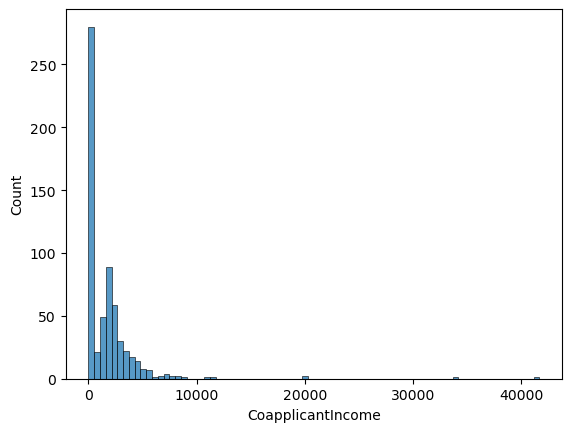

In [126]:
import seaborn as sns
sns.histplot(data['CoapplicantIncome'])

In [127]:
len(data['Loan_Status (Approved)'].unique())

2

In [128]:
data['Loan_Status (Approved)'].unique()

array(['Y', 'N'], dtype=object)

In [129]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode())

In [130]:
data['LoanAmount'].mean

<bound method Series.mean of 0        NaN
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64>

In [131]:
data.Dependents.value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

<Axes: xlabel='Dependents', ylabel='count'>

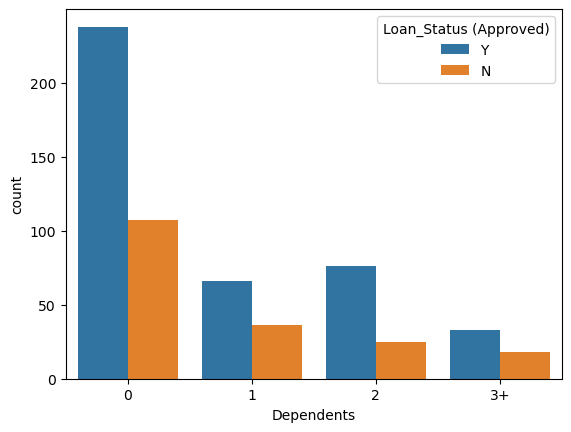

In [132]:
sns.countplot(x='Dependents',data=data,hue='Loan_Status (Approved)')

In [133]:
mean_app=data['ApplicantIncome'].mean()
std_app=data['ApplicantIncome'].std()
print(mean_app ,std_app)

5403.459283387622 6109.041673387174


In [134]:
from sklearn.preprocessing import OneHotEncoder


In [135]:
df1=pd.get_dummies (data['Property_Area'],prefix='Property_Area',drop_first=True)
print(df1)
data=pd.concat([data,df1],axis=1).drop(['Property_Area'],axis=1)
print(data)

     Property_Area_Semiurban  Property_Area_Urban
0                      False                 True
1                      False                False
2                      False                 True
3                      False                 True
4                      False                 True
..                       ...                  ...
609                    False                False
610                    False                False
611                    False                 True
612                    False                 True
613                     True                False

[614 rows x 2 columns]
      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008   

In [136]:
df2=pd.get_dummies (data['Married'],prefix='M',drop_first=True)
print(df2)
data=pd.concat([data,df2],axis=1).drop(['Married'],axis=1)
print(data)

     M_Yes
0    False
1     True
2     True
3     True
4    False
..     ...
609  False
610   True
611   True
612   True
613  False

[614 rows x 1 columns]
      Loan_ID  Gender Dependents     Education Self_Employed  ApplicantIncome  \
0    LP001002    Male          0      Graduate            No             5849   
1    LP001003    Male          1      Graduate            No             4583   
2    LP001005    Male          0      Graduate           Yes             3000   
3    LP001006    Male          0  Not Graduate            No             2583   
4    LP001008    Male          0      Graduate            No             6000   
..        ...     ...        ...           ...           ...              ...   
609  LP002978  Female          0      Graduate            No             2900   
610  LP002979    Male         3+      Graduate            No             4106   
611  LP002983    Male          1      Graduate            No             8072   
612  LP002984    Male          2  

In [137]:
df3=pd.get_dummies (data['Education'],prefix='Edu',drop_first=True)
print(df3)
data=pd.concat([data,df1],axis=1).drop(['Education'],axis=1)
print(data)

     Edu_Not Graduate
0               False
1               False
2               False
3                True
4               False
..                ...
609             False
610             False
611             False
612             False
613             False

[614 rows x 1 columns]
      Loan_ID  Gender Dependents Self_Employed  ApplicantIncome  \
0    LP001002    Male          0            No             5849   
1    LP001003    Male          1            No             4583   
2    LP001005    Male          0           Yes             3000   
3    LP001006    Male          0            No             2583   
4    LP001008    Male          0            No             6000   
..        ...     ...        ...           ...              ...   
609  LP002978  Female          0            No             2900   
610  LP002979    Male         3+            No             4106   
611  LP002983    Male          1            No             8072   
612  LP002984    Male          2          

In [138]:
df4=pd.get_dummies (data['Self_Employed'],prefix='self',drop_first=True)
print(df4)
data=pd.concat([data,df1],axis=1).drop(['Self_Employed'],axis=1)
print(data)

     self_Yes
0       False
1       False
2        True
3       False
4       False
..        ...
609     False
610     False
611     False
612     False
613      True

[614 rows x 1 columns]
      Loan_ID  Gender Dependents  ApplicantIncome  CoapplicantIncome  \
0    LP001002    Male          0             5849                0.0   
1    LP001003    Male          1             4583             1508.0   
2    LP001005    Male          0             3000                0.0   
3    LP001006    Male          0             2583             2358.0   
4    LP001008    Male          0             6000                0.0   
..        ...     ...        ...              ...                ...   
609  LP002978  Female          0             2900                0.0   
610  LP002979    Male         3+             4106                0.0   
611  LP002983    Male          1             8072              240.0   
612  LP002984    Male          2             7583                0.0   
613  LP002990  F

In [139]:
df5=pd.get_dummies (data['CoapplicantIncome'],prefix='applicant',drop_first=True)
print(df1)
data=pd.concat([data,df1],axis=1).drop(['CoapplicantIncome'],axis=1)
print(data)

     Property_Area_Semiurban  Property_Area_Urban
0                      False                 True
1                      False                False
2                      False                 True
3                      False                 True
4                      False                 True
..                       ...                  ...
609                    False                False
610                    False                False
611                    False                 True
612                    False                 True
613                     True                False

[614 rows x 2 columns]
      Loan_ID  Gender Dependents  ApplicantIncome  LoanAmount  \
0    LP001002    Male          0             5849         NaN   
1    LP001003    Male          1             4583       128.0   
2    LP001005    Male          0             3000        66.0   
3    LP001006    Male          0             2583       120.0   
4    LP001008    Male          0             6000  

In [140]:
data.columns.value_counts()

Property_Area_Urban        4
Property_Area_Semiurban    4
Loan_ID                    1
Dependents                 1
Gender                     1
ApplicantIncome            1
LoanAmount                 1
Credit_History             1
Loan_Amount_Term           1
Loan_Status (Approved)     1
M_Yes                      1
Name: count, dtype: int64

In [141]:
data

,Loan_ID,Gender,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),Property_Area_Semiurban,Property_Area_Urban,M_Yes,Property_Area_Semiurban,Property_Area_Urban,Property_Area_Semiurban,Property_Area_Urban,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,Male,0,5849,NaN,360.0,1.0,Y,False,True,False,False,True,False,True,False,True
1,LP001003,Male,1,4583,128.0,360.0,1.0,N,False,False,True,False,False,False,False,False,False
2,LP001005,Male,0,3000,66.0,360.0,1.0,Y,False,True,True,False,True,False,True,False,True
3,LP001006,Male,0,2583,120.0,360.0,1.0,Y,False,True,True,False,True,False,True,False,True
4,LP001008,Male,0,6000,141.0,360.0,1.0,Y,False,True,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,0,2900,71.0,360.0,1.0,Y,False,False,False,False,False,False,False,False,False
610,LP002979,Male,3+,4106,40.0,180.0,1.0,Y,False,False,True,False,False,False,False,False,False
611,LP002983,Male,1,8072,253.0,360.0,1.0,Y,False,True,True,False,True,False,True,False,True
612,LP002984,Male,2,7583,187.0,360.0,1.0,Y,False,True,True,False,True,False,True,False,True


In [142]:
data["LoanAmount"].kurtosis()

np.float64(10.40153349029416)

In [143]:
data["LoanAmount"].skew()

np.float64(2.677551679256059)

In [144]:
from sklearn.preprocessing import PowerTransformer
trans=PowerTransformer(method='yeo-johnson')

la_trans=trans.fit_transform(data[["LoanAmount"]])
la_trans.shape

(614, 1)

In [145]:
print(pd.Series(la_trans.reshape(614,)).skew())
pd.Series(la_trans.reshape(614,)).kurtosis()

0.01976626758762915


np.float64(2.25679928793541)

<Axes: ylabel='Count'>

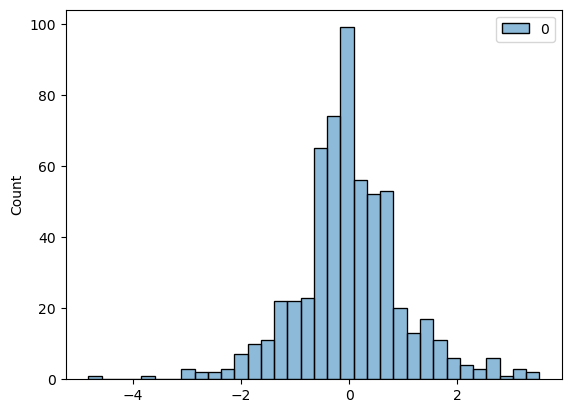

In [146]:
sns.histplot(la_trans)

In [147]:
import numpy as np
np.log(data['LoanAmount'])

0           NaN
1      4.852030
2      4.189655
3      4.787492
4      4.948760
         ...   
609    4.262680
610    3.688879
611    5.533389
612    5.231109
613    4.890349
Name: LoanAmount, Length: 614, dtype: float64

In [148]:
data['LoanAmount']**2

0          NaN
1      16384.0
2       4356.0
3      14400.0
4      19881.0
        ...   
609     5041.0
610     1600.0
611    64009.0
612    34969.0
613    17689.0
Name: LoanAmount, Length: 614, dtype: float64

-0.09294567889276603
4.77062663426899


0      34210801
1      21003889
2       9000000
3       6671889
4      36000000
         ...   
609     8410000
610    16859236
611    65157184
612    57501889
613    21003889
Name: ApplicantIncome, Length: 614, dtype: int64

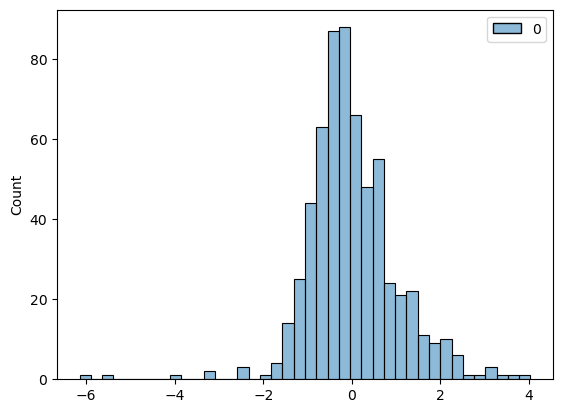

In [151]:
la_trans1=trans.fit_transform(data[['ApplicantIncome']])
la_trans1.shape

print(pd.Series(la_trans1.reshape(614,)).skew())
print(pd.Series(la_trans1.reshape(614,)).kurtosis())

sns.histplot(la_trans1)

import numpy as np
np.log(data['ApplicantIncome'])

data['ApplicantIncome']**2